In [5]:
# чтобы работал и python, и R
%load_ext rpy2.ipython

NameError: name 'pip' is not defined

# Вариант 0

In [1]:

dat <- read.csv("var_0.csv")

In [2]:

install.packages("TSA")
library(TSA)

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  не могу открыть URL 'https://cran.r-project.org/src/contrib/PACKAGES'"Warning message:
"package 'TSA' is not available (for R version 3.6.1)"Warning message:
"unable to access index for repository https://cran.r-project.org/bin/windows/contrib/3.6:
  не могу открыть URL 'https://cran.r-project.org/bin/windows/contrib/3.6/PACKAGES'"

ERROR: Error in library(TSA): there is no package called 'TSA'


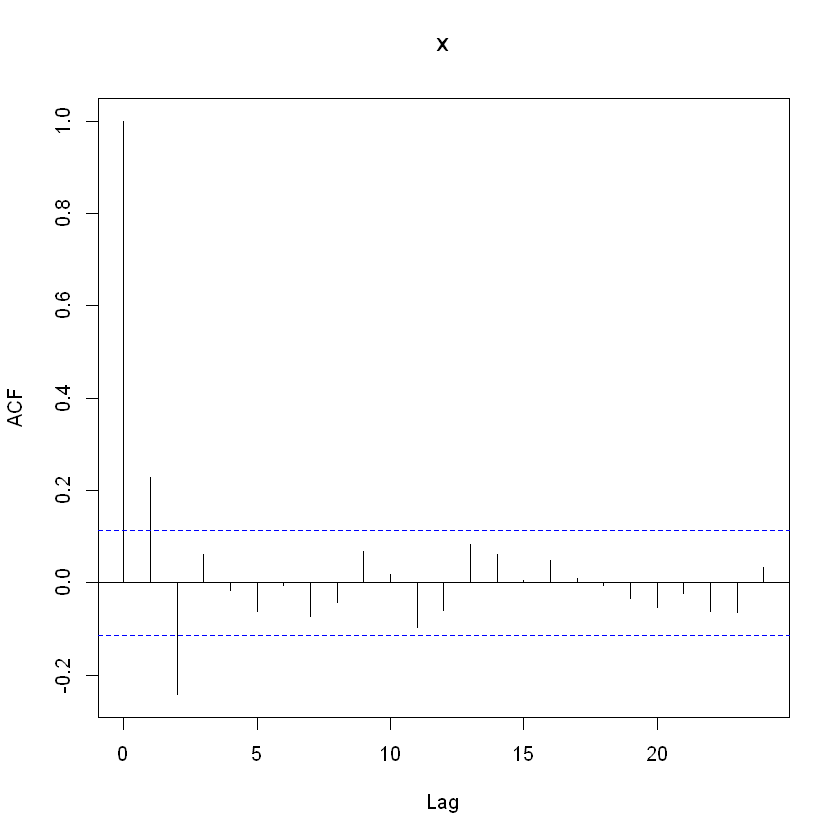

In [3]:

acf(dat)

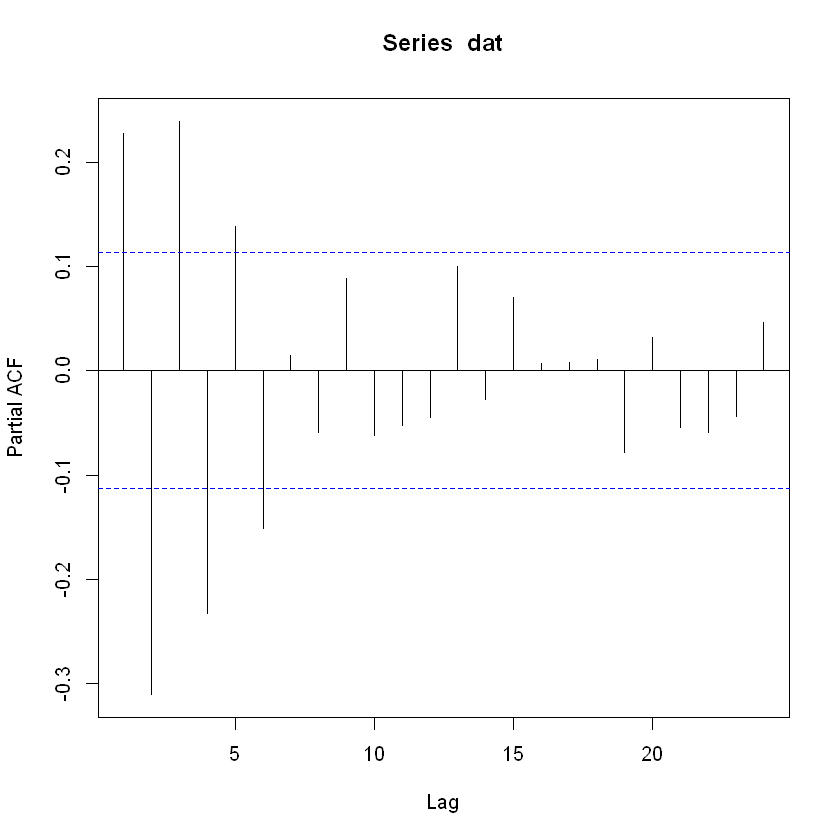

In [4]:

pacf(dat)

MA, порядок 2

In [5]:

# метод максимального правдоподобия + статистика Акаике
ml = arima(dat, order = c(0,0,2),method="ML")
ml$aic

[1] 857.8013

In [6]:
# параметры (в ответ нужно ЭТИ)
ml$coef

ma1        ma2  intercept 
 0.4970646 -0.3192890  0.0401445

In [7]:

# параметры
ma2 = arima(dat, order = c(0,0,2),method="CSS")
ma2$coef

ma1         ma2   intercept 
 0.48951366 -0.31879894  0.03628525

In [8]:
# тест Льюнг-Бокса
res <- ma2$residuals
Box.test(res, lag = 6, type = "Ljung-Box", fitdf = 2)


	Box-Ljung test

data:  res
X-squared = 3.1493, df = 4, p-value = 0.5332


In [10]:
ar1 <- ar(dat, method="yule-walker")
ar1 <- ar(dat, method="yw")
ar1$order

[1] 6

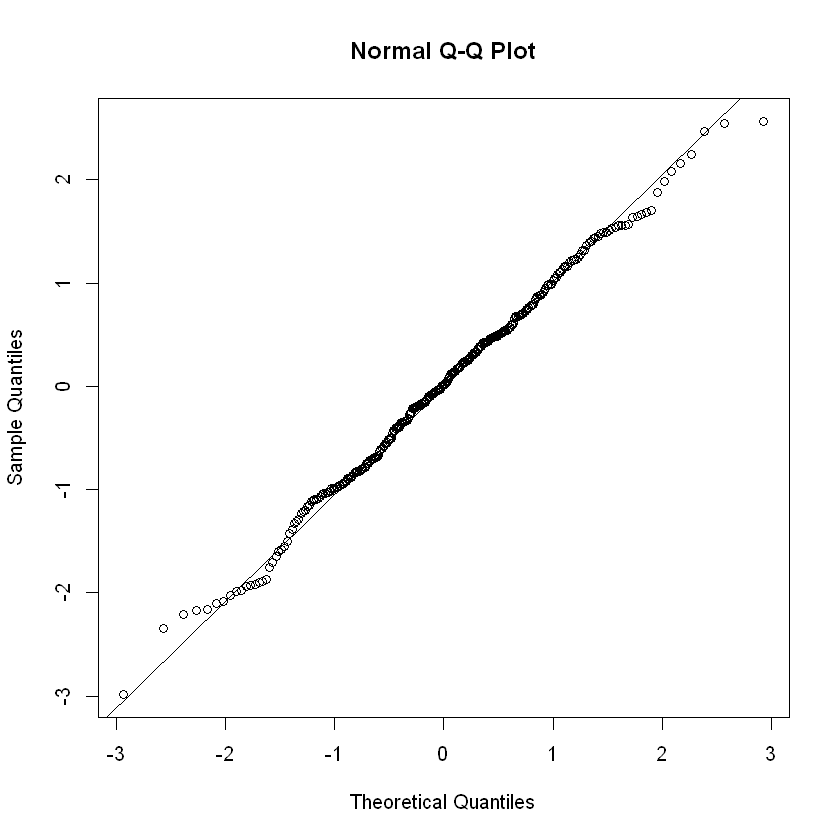

In [9]:
qqnorm(res)
qqline(res)

# Вариант 16

In [11]:
dat <- read.csv("var_16.csv")

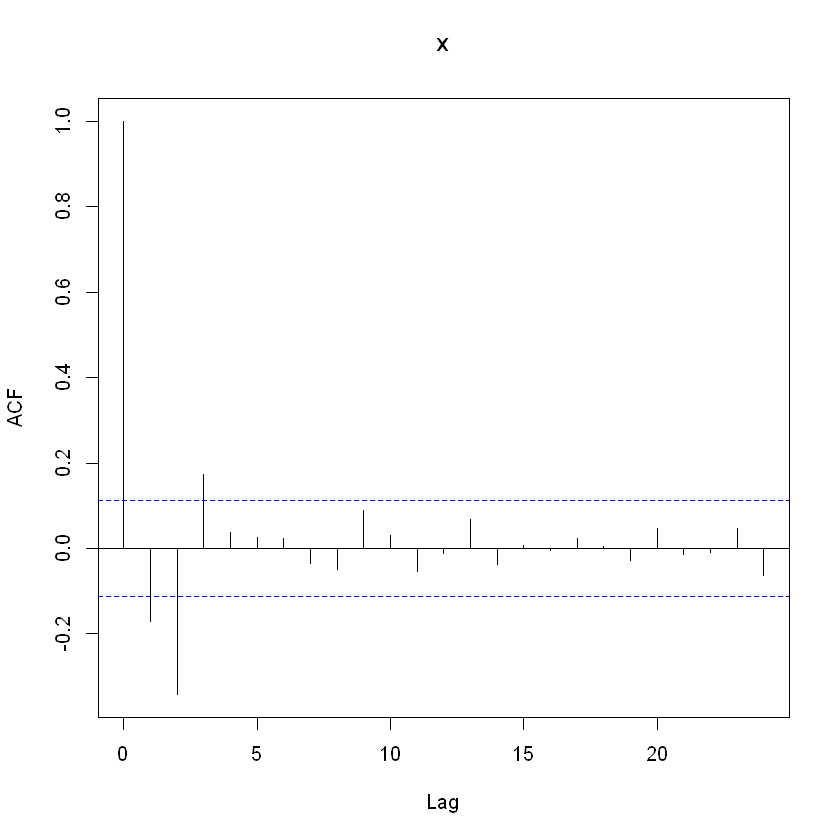

In [12]:

acf(dat)

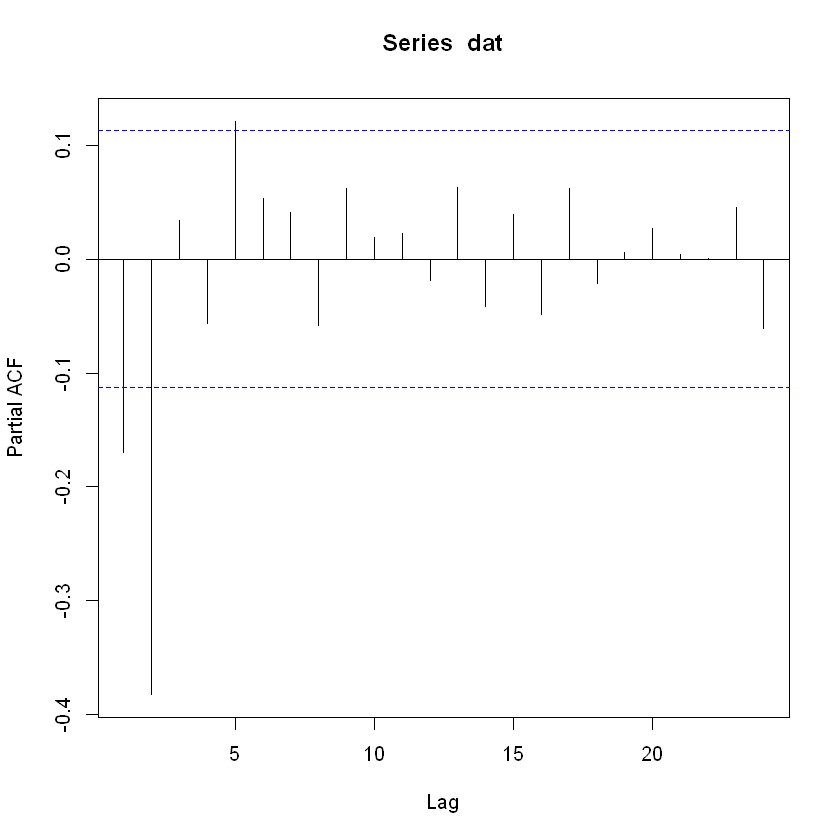

In [13]:
pacf(dat)

AR, порядок 2 (мб конечно 1, но скорее 2, проверяется ML)

In [58]:

# метод максимального правдоподобия + статистика Акаике
ml = arima(dat, order = c(0,0,3),method="ML")
ml$aic

[1] 858.4501

Всё-таки 2

In [59]:
# параметры (в ответ нужно ЭТИ)
ml$coef

ma1         ma2         ma3   intercept 
-0.22879850 -0.35597680  0.26871747 -0.01331551

In [60]:
# параметры
ma2 = arima(dat, order = c(0,0,3),method="CSS")
ma2$coef

ma1         ma2         ma3   intercept 
-0.22787170 -0.35719798  0.27070522 -0.01384947

In [61]:
# тест Льюнг-Бокса
res <- ml$residuals
Box.test(res, lag = 6, type = "Ljung-Box", fitdf = 2)


	Box-Ljung test

data:  res
X-squared = 1.221, df = 4, p-value = 0.8746


In [63]:
ar1 <- ar(dat, method="yule-walker")
ar1 <- ar(dat, method="yw")
ar1$order

[1] 2

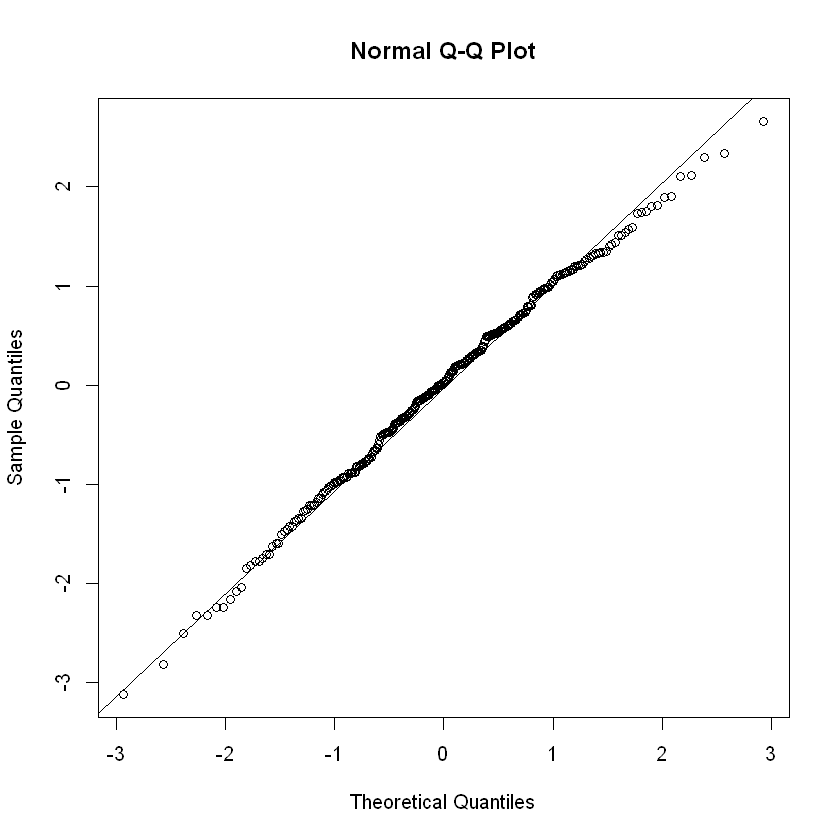

In [37]:

qqnorm(res)
qqline(res)